- The outputs from the pest analysis is analyzed here. The following notebook provides a template for future notebooks.

File name - Case1_B_glm_rw_restart2.demo {Simulation is carried out with 20 parameters (10 for each material) }

1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU) - - Check from Pg. 100 - pestpp.5.0.8_manual.pdf
    - Input data
    - Sensitivity
    - Objective function
    - Residuals
    - Relative contribution of temperature and moisture on the objective function
    - Identifibility tool (TODO)
    - Covariance matrix (TODO)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.insert(0,'../pestools')

In [3]:
import os
main_cwd = os.getcwd()
print(main_cwd)

/bigwork/nhgjrabl/Simulations/pestpp/rk_model_final_4yrs_su


In [4]:
from matplotlib.ticker import MaxNLocator
#import parsen

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

### 1. Self-analysis (with inspiration from PEST-related articles, PESTools, PyEMU)
#### a. Started with accessing the input data

In [7]:
directory_name = 'Case5_III_su_cv_rw.demo'
cf_name = 'Case5_III_su_cv_cf_v1_rw' # Control file name 

In [8]:
os.getcwd()

'/bigwork/nhgjrabl/Simulations/pestpp/rk_model_final_4yrs_su'

#### b. Parameter Sensitivity 

In [9]:
sen_iteration = pd.read_csv(f'{directory_name}/{cf_name}.isen')
sen_iteration.index = sen_iteration['iteration']
sen_iteration.drop(axis=1, columns=['iteration'], inplace=True)
sen_iteration

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
1,0.000060,0.000158,0.000070,0.000060,0.000014,0.000018,2352.44,6.053710e+05,0.000005,0.000003,0.000067,3.546960e-09
2,0.000089,0.000408,0.000069,0.000061,0.000015,0.000018,6581.78,8.351480e+06,0.000002,0.000001,0.000146,2.077480e-08
3,0.000103,0.000366,0.000010,0.000061,0.000014,0.000018,4108.09,6.885040e+01,0.000001,0.000004,0.000157,4.397400e-08
4,0.000109,0.000380,0.000010,0.000061,0.000014,0.000018,4147.46,6.664350e+06,0.000003,0.000003,0.000160,4.578890e-08
5,0.000108,0.000127,0.000010,0.000061,0.000016,0.000018,3497.14,2.430540e+01,0.000005,0.000001,0.000264,4.459680e-08
6,0.000095,0.000113,0.000010,0.000061,0.000016,0.000018,3242.81,1.275200e+06,0.000002,0.000001,0.000189,4.504170e-08


In [10]:
len(sen_iteration.columns.values)

12

In [11]:
np.arange(len(sen_iteration.columns.values))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

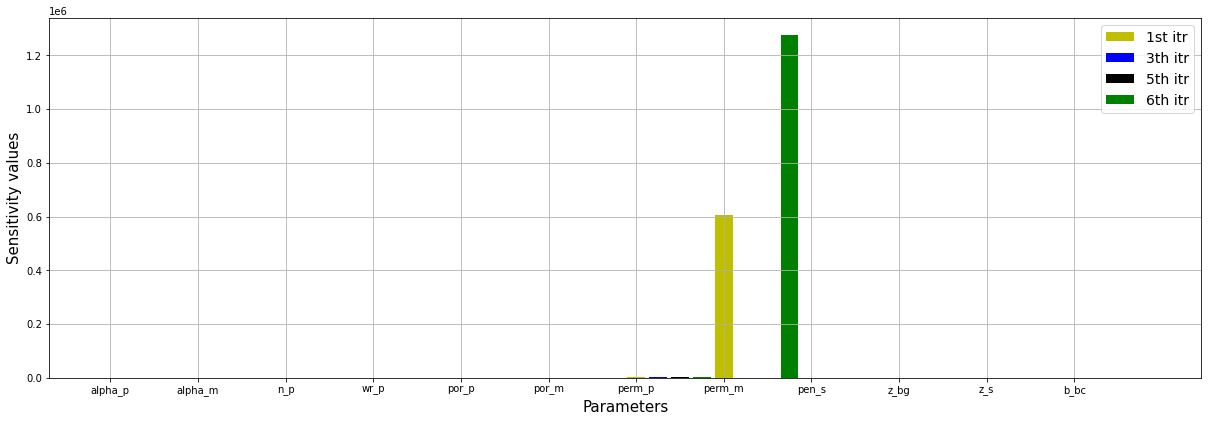

In [12]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])

#for
X = np.arange(len(sen_iteration.columns.values)) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, sen_iteration.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, sen_iteration.iloc[2,:], color='b', label='3th itr', width=0.2)
ax.bar(X + 0.5, sen_iteration.iloc[4,:], color='k', label='5th itr', width=0.2)
ax.bar(X + 0.75, sen_iteration.iloc[5,:], color='g', label='6th itr', width=0.2)

#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

##### Relative sensitivity values

In [13]:
sen_iteration.iloc[0,:].max()

605371.0

In [14]:
relative_set_itr = sen_iteration.copy()
for i, value in enumerate(sen_iteration.index):
    relative_set_itr.iloc[i,:] = relative_set_itr.iloc[0,:]/relative_set_itr.iloc[0,:].max()

relative_set_itr

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
1,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15
2,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15
3,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15
4,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15
5,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15
6,9.834234e-11,2.617321e-10,1.149318e-10,9.961429e-11,2.278206e-11,3.030852e-11,0.003886,1.0,7.932755e-12,4.313388e-12,1.101592e-10,5.859151e-15


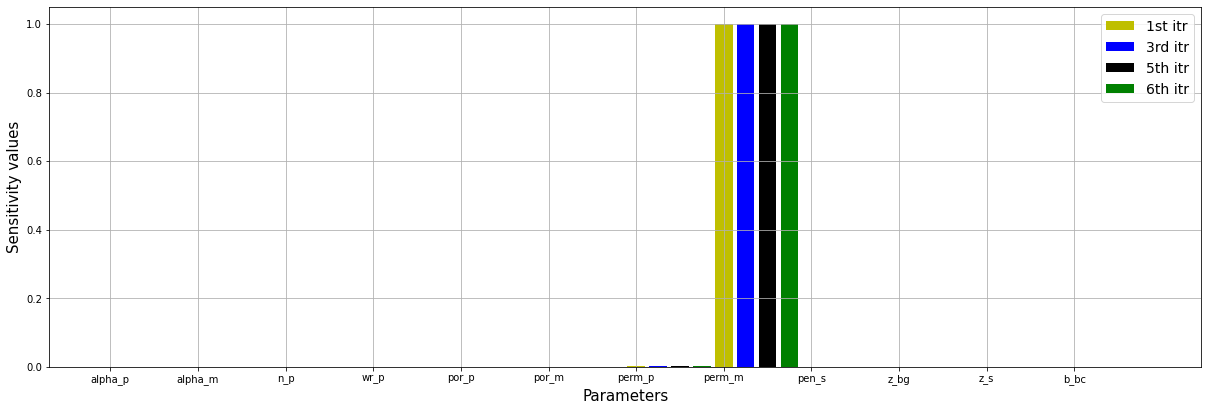

In [15]:
# Example
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
fig = plt.figure()
fig.set_size_inches(16,5)
ax = fig.add_axes([0,0,1,1])
#for
X = X = np.arange(len(sen_iteration.columns.values)) # Number of parts to consider
x = len(sen_iteration.index)

ax.bar(X + 0.0, relative_set_itr.iloc[0,:], color='y', label='1st itr', width=0.2)
ax.bar(X + 0.25, relative_set_itr.iloc[2,:], color='b', label='3rd itr', width=0.2)
ax.bar(X + 0.5, relative_set_itr.iloc[4,:], color='k', label='5th itr', width=0.2)
ax.bar(X + 0.75, relative_set_itr.iloc[5,:], color='g', label='6th itr', width=0.2)



#ax.bar(X + 0.25, si_mineral_temp.iloc[0,:],color='tab:brown', label='mineral', width=0.25)
#ax.bar(X + 0.5, si_bedrock_temp.iloc[0,:], color='k', label='bedrock', width=0.25)
major_ticks = np.arange(0, len(sen_iteration.columns.values), 1)
ax.set_xticks(major_ticks)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = sen_iteration.columns.values
ax.set_xticklabels(labels)
ax.legend(fontsize=14)
ax.set_ylabel('Sensitivity values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Parameters', fontsize=15)
ax.grid(b=True)

### Plotting the change in parameters:


In [16]:
par_iteration = pd.read_csv(f'{directory_name}/{cf_name}.ipar')
par_iteration.index = par_iteration['iteration']
par_iteration.drop(axis=1, columns=['iteration'], inplace=True)
par_iteration

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
0,0.010000,0.001825,1.50000,0.100000,0.637390,0.481031,5.346620e-11,1.000000e-13,0.020000,0.040000,0.005000,268.45
1,0.009634,0.001758,1.50090,0.101236,0.637723,0.481078,8.668510e-11,2.500000e-14,0.019972,0.040008,0.004857,268.45
2,0.008756,0.001943,1.50654,0.108242,0.639846,0.481640,9.356590e-11,3.721800e-14,0.019880,0.039958,0.004868,268.45
3,0.008756,0.001943,1.50654,0.108242,0.639846,0.481640,9.356590e-11,2.500000e-14,0.019880,0.039958,0.004868,268.45
4,0.006940,0.002572,1.50117,0.134559,0.646577,0.483206,9.356590e-11,2.500000e-14,0.020710,0.040355,0.001250,268.45
5,0.006875,0.002575,1.50115,0.134712,0.646619,0.483211,9.356450e-11,7.194090e-14,0.020706,0.040354,0.001250,268.45
6,0.006875,0.002575,1.50115,0.134712,0.646619,0.483211,9.356590e-11,7.193600e-14,0.020706,0.040354,0.001250,268.45


##### Changing the parameters relative to the initial value
- To ensure that we can plot the changes with respect to the parameters, we subtract the parameter values w.r.t the initial values and then multiply by 100.
\begin{equation}
    par_{change} = \frac{(par_{final} - par_{initial})}{par_{initial}} * 100
\end{equation}

In [17]:
par_change = par_iteration.copy()
#pargp_initial = par_change.iloc[0,:]
for i, index_value in enumerate(par_change.index):
    for j, col_value in enumerate(par_change.columns):
        #print(i, j)
        #print(par_change.iloc[i,j])
        par_change.iloc[i,j] = (par_iteration.iloc[i,j] - par_iteration.iloc[0,j])/par_iteration.iloc[0,j]*100
#np.abs(par_change)
par_change

,alpha_p,alpha_m,n_p,wr_p,por_p,por_m,perm_p,perm_m,pen_s,z_bg,z_s,b_bc
iteration,,,,,,,,,,,,
0,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0000,0.0000,0.00000,0.0000,0.0
1,-3.6577,-3.669222,0.060000,1.236,0.052244,0.009771,62.130655,-75.0000,-0.1385,0.02025,-2.8516,0.0
2,-12.4405,6.494019,0.436000,8.242,0.385321,0.126603,75.000094,-62.7820,-0.5985,-0.10500,-2.6466,0.0
3,-12.4406,6.494019,0.436000,8.242,0.385321,0.126603,75.000094,-75.0000,-0.5985,-0.10500,-2.6466,0.0
4,-30.6044,40.917634,0.078000,34.559,1.441347,0.452154,75.000094,-75.0000,3.5500,0.88650,-75.0000,0.0
5,-31.2537,41.098465,0.076667,34.712,1.447936,0.453193,74.997475,-28.0591,3.5280,0.88575,-75.0000,0.0
6,-31.2538,41.098465,0.076667,34.712,1.447936,0.453193,75.000094,-28.0640,3.5280,0.88575,-75.0000,0.0


#### Line plot of all parameter values


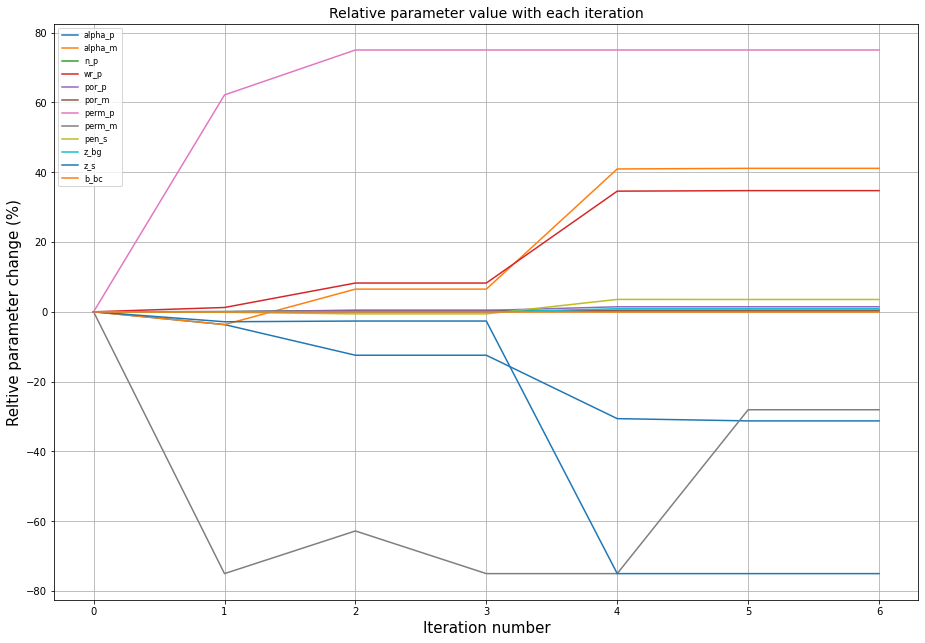

In [18]:
fig = plt.figure()
fig.set_size_inches(12,8)
ax = fig.add_axes([0,0,1,1])

for i, value in enumerate(par_change.columns):
    ax.plot(par_change.iloc[:,i], label=f'{value}')
    

#ax.set_title(f'Relative parameter value with each iteration: Initial values - n_m = {np.round(par_iteration.iloc[0,0],5)}, tcs_m = {np.round(par_iteration.iloc[0,1],5)}, af_m = {np.round(par_iteration.iloc[0,2],5)}, af_p = {np.round(par_iteration.iloc[0,3],5)}', fontsize=14)
ax.set_title(f'Relative parameter value with each iteration',fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=10)
ax.set_xlabel('Iteration number', fontsize=15)
ax.set_ylabel('Reltive parameter change (%)', fontsize=15)
ax.legend(fontsize=8)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

### c. Objective function

In [37]:
no_iteration = np.arange(1,len(par_change.index),1)
no_iteration

array([1, 2, 3, 4, 5, 6])

In [38]:
# Residual files - importing the values from the file
# Residual files after each iteration
no_iteration = np.arange(1,len(par_change.index),1)
for i, value in enumerate(no_iteration):
    locals()[f'res_{value}'] = pd.read_csv(f'{directory_name}/{cf_name}.rei{value}', skiprows=2,delim_whitespace=True)

#res_best = pd.read_csv(f'{directory_name}/rk_model_glm_cf.res', skiprows=2,delim_whitespace=True)
#res_best
res_1.head()

,Name,Group,Measured,Modelled,Residual,Weight
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.000443
1,stemp_0.04_1,temp,261.2884,262.854919,-1.566519,0.000443
2,stemp_0.04_2,temp,261.3255,263.736514,-2.411014,0.000443
3,stemp_0.04_3,temp,261.1522,264.340751,-3.188551,0.000443
4,stemp_0.04_4,temp,260.7784,264.735601,-3.957201,0.000443


#### Analyzing the residual weights:


In [39]:
res_1['Weight'].describe()

count    5124.000000
mean        0.000294
std         0.000149
min         0.000145
25%         0.000145
50%         0.000294
75%         0.000443
max         0.000443
Name: Weight, dtype: float64

In [40]:
res_1['Weight'].unique()

array([0.00044307, 0.00014522])

In [41]:
# Following the code from line 94 - file : res.py
def obj_fun(rei_df):
    """
    Function defined to calculate the objective function along with the residual values
    
    Input: rei_df - Residual dataframe
    
    
    """
    
    # Apply weighted residual and calculate phi contributions
    rei_df['Weighted_Residual'] = rei_df['Residual'] * rei_df['Weight']
    rei_df['Absolute_Residual'] = abs(rei_df['Residual'])
    rei_df['Weighted_Absolute_Residual'] = rei_df['Absolute_Residual'] * rei_df['Weight']
    
    # Calculate phi
    rei_df['Weighted_Sq_Residual'] = rei_df['Weighted_Residual']**2
    
    # Percentage contribution by each observation
    rei_df['Phi_Percent'] = rei_df['Weighted_Sq_Residual']/(rei_df['Weighted_Sq_Residual'].sum())*100
    
    return rei_df

In [42]:
# Finding the variation of residuals
for i, value in enumerate(no_iteration):
    locals()[f'res_phi_{value}'] = obj_fun(locals()[f'res_{value}'])
    
#res_phi_1 = obj_fun(res_1)
res_phi_1.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.000443,0.000140,0.316028,0.000140,1.960593e-08,0.000100
1,stemp_0.04_1,temp,261.2884,262.854919,-1.566519,0.000443,-0.000694,1.566519,0.000694,4.817342e-07,0.002456
2,stemp_0.04_2,temp,261.3255,263.736514,-2.411014,0.000443,-0.001068,2.411014,0.001068,1.141132e-06,0.005817
3,stemp_0.04_3,temp,261.1522,264.340751,-3.188551,0.000443,-0.001413,3.188551,0.001413,1.995828e-06,0.010175
4,stemp_0.04_4,temp,260.7784,264.735601,-3.957201,0.000443,-0.001753,3.957201,0.001753,3.074061e-06,0.015671


In [43]:
res_phi_1['Weighted_Sq_Residual'].mean()

3.82823709521096e-06

In [44]:
# Defining a dataframe with a objective function
# Changing the units by multiplying by 1e6

objfn_phi = pd.DataFrame(index=no_iteration,columns=['obj_func'])

for i, value in enumerate(no_iteration):
    objfn_phi.iloc[i,0] = locals()[f'res_phi_{i+1}']['Weighted_Sq_Residual'].mean()*1e7

objfn_phi.head()

,obj_func
1,38.282371
2,37.735336
3,37.733626
4,35.814764
5,35.806803


In [45]:
#fig, ax = plt.subplots(figsize=(14, 6))

#plt.figure(figsize=(10, 6))
#ax.plot(objfn_phi['obj_func'])
#ax.set_title('Plotting objective function with each iteration ', fontsize=15)
#ax.set_ylabel('Objective function (*1e7)', fontsize=12)
#ax.set_xlabel('Iteration number', fontsize=12)
#for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    #label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.grid()

The values were calculated using a formula. It not the same as the objective function calculated by the PEST program!

Comments:
    
* It shows here that the second iteration has the least objective function value

How to determine the parameter dataset and residual values with the best dataset?

#### Accessing the objective function with every iteration 

In [46]:
obj_iteration = pd.read_csv(f'{directory_name}/{cf_name}.iobj')
#obj_iteration.index = par_iteration['iteration']
obj_iteration.drop(axis=1, columns=['iteration'], inplace=True)
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.019674,0.019674,0,0.009837,0.009837
1,23,0.019616,0.019616,0,0.009839,0.009777
2,45,0.019336,0.019336,0,0.009826,0.009509
3,79,0.019335,0.019335,0,0.009825,0.009509
4,113,0.018351,0.018351,0,0.009774,0.008578
5,147,0.018347,0.018347,0,0.009776,0.008572
6,181,0.018346,0.018346,0,0.009774,0.008572


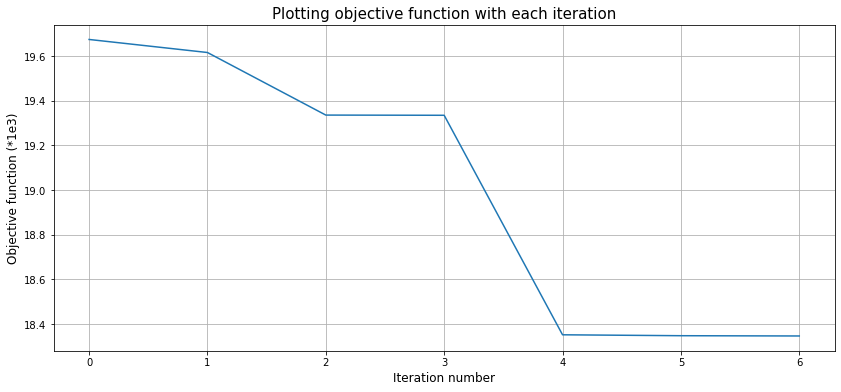

<Figure size 720x432 with 0 Axes>

In [47]:
fig, ax = plt.subplots(figsize=(14, 6))

plt.figure(figsize=(10, 6))
ax.plot(obj_iteration['total_phi']*1e3)
ax.set_title('Plotting objective function with each iteration', fontsize=15)
ax.set_ylabel('Objective function (*1e3)', fontsize=12)
ax.set_xlabel('Iteration number', fontsize=12)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
#plt.ylim(3.5, 3.6)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(b=True)

**Comments:**
- The objective function is reducing with each iteration.

### d. Residuals
1. First choose the iteration with the minimum objective function value.
2. Then plot the residual based on this iteration

In [48]:
obj_iteration['total_phi'].idxmin()
# The iteration with the minimum objective function

6

In [49]:
# Finding the index where we will be encountering the minimum objective function
itrno_best = obj_iteration['total_phi'].idxmin()

# Finding the corresponding residuals
res_best = locals()[f'res_{itrno_best}'].copy()

res_best.head()

,Name,Group,Measured,Modelled,Residual,Weight,Weighted_Residual,Absolute_Residual,Weighted_Absolute_Residual,Weighted_Sq_Residual,Phi_Percent
0,stemp_0.04_0,temp,260.6422,260.326172,0.316028,0.000443,0.000140,0.316028,0.000140,1.960593e-08,0.000107
1,stemp_0.04_1,temp,261.2884,262.718982,-1.430582,0.000443,-0.000634,1.430582,0.000634,4.017552e-07,0.002190
2,stemp_0.04_2,temp,261.3255,263.599720,-2.274220,0.000443,-0.001008,2.274220,0.001008,1.015316e-06,0.005534
3,stemp_0.04_3,temp,261.1522,264.222888,-3.070688,0.000443,-0.001361,3.070688,0.001361,1.851006e-06,0.010089
4,stemp_0.04_4,temp,260.7784,264.618277,-3.839877,0.000443,-0.001701,3.839877,0.001701,2.894483e-06,0.015777


In [53]:
len(res_best)

5124

In [64]:
# The total length of observation values is 5124/2 = 7672
obs_gp_values = 2562

In [65]:
temp_measured = res_best.iloc[:obs_gp_values,2] # The 2nd column contains the measured values and we have only temperature values from the first 7672 values
mois_measured = res_best.iloc[obs_gp_values:,2]

temp_sim = res_best.iloc[:obs_gp_values,3] # The 3rd column contains the simulated values 
mois_sim = res_best.iloc[obs_gp_values:,3]

temp_res = res_best.iloc[:obs_gp_values,4] # The 4th column contains the residual values 
mois_res = res_best.iloc[obs_gp_values:,4]

In [66]:
mois_measured

2562    7.897694
2563    7.991826
2564    7.992500
2565    7.960069
2566    7.913792
          ...   
5119    5.618472
5120    5.536389
5121    5.470486
5122    5.425951
5123    5.411007
Name: Measured, Length: 2562, dtype: float64

Text(0.5, 0, 'Days')

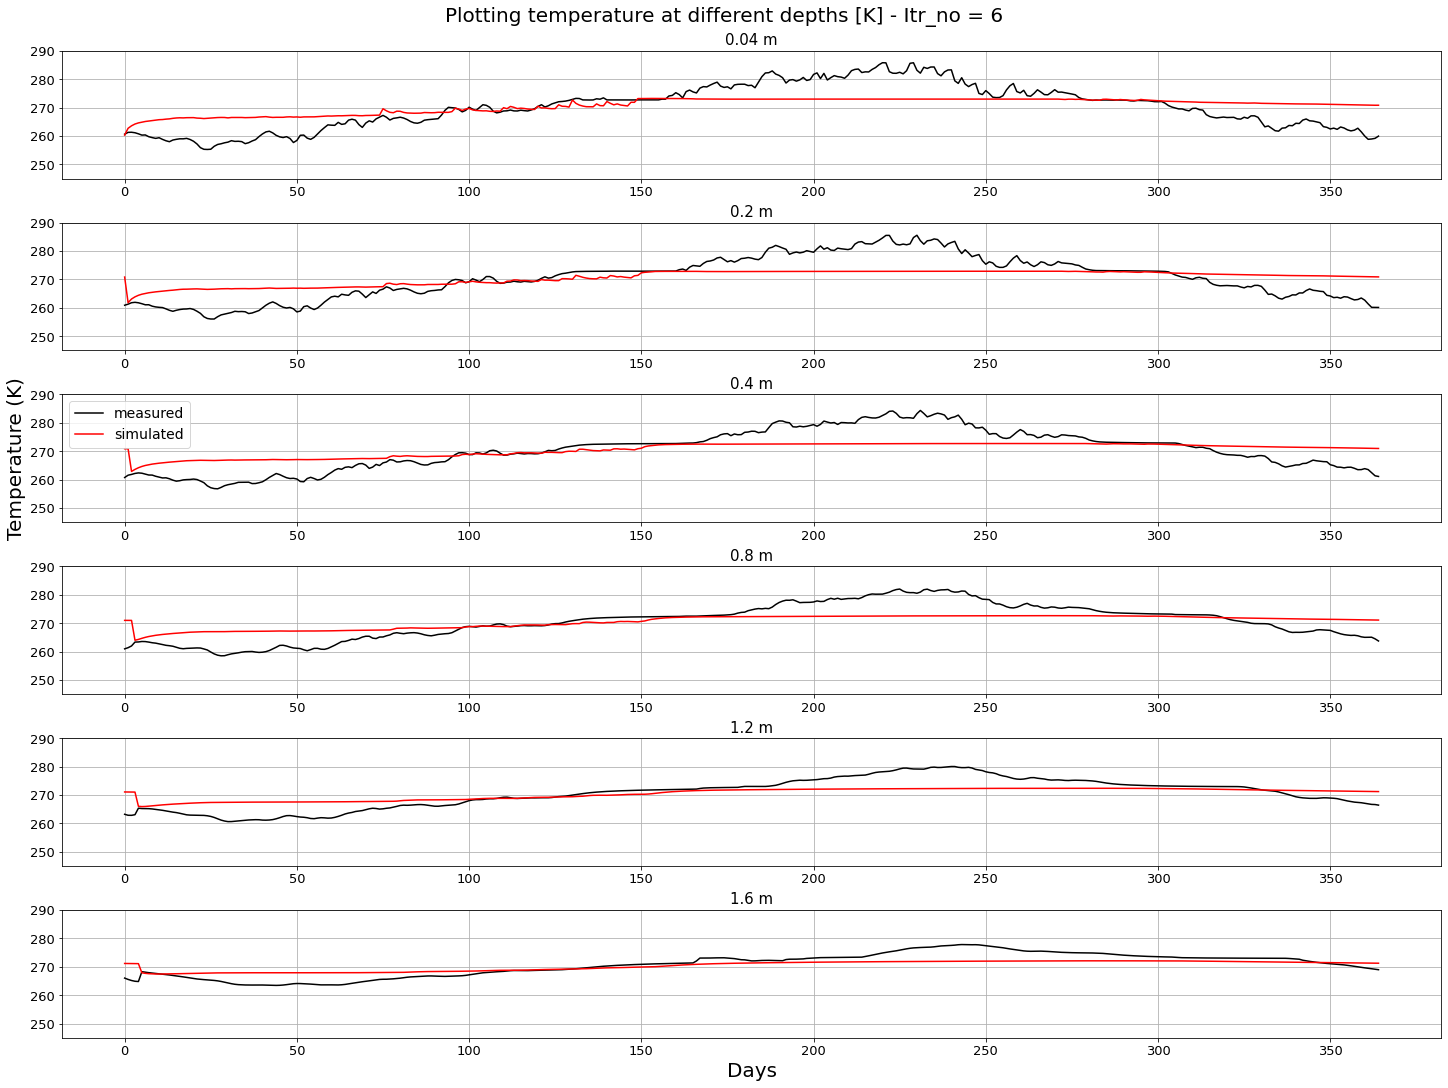

In [67]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting temperature at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, temp_sim[x:x+365].values, 'r', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(245,290)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Temperature (K)', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Text(0.5, 0, 'Days')

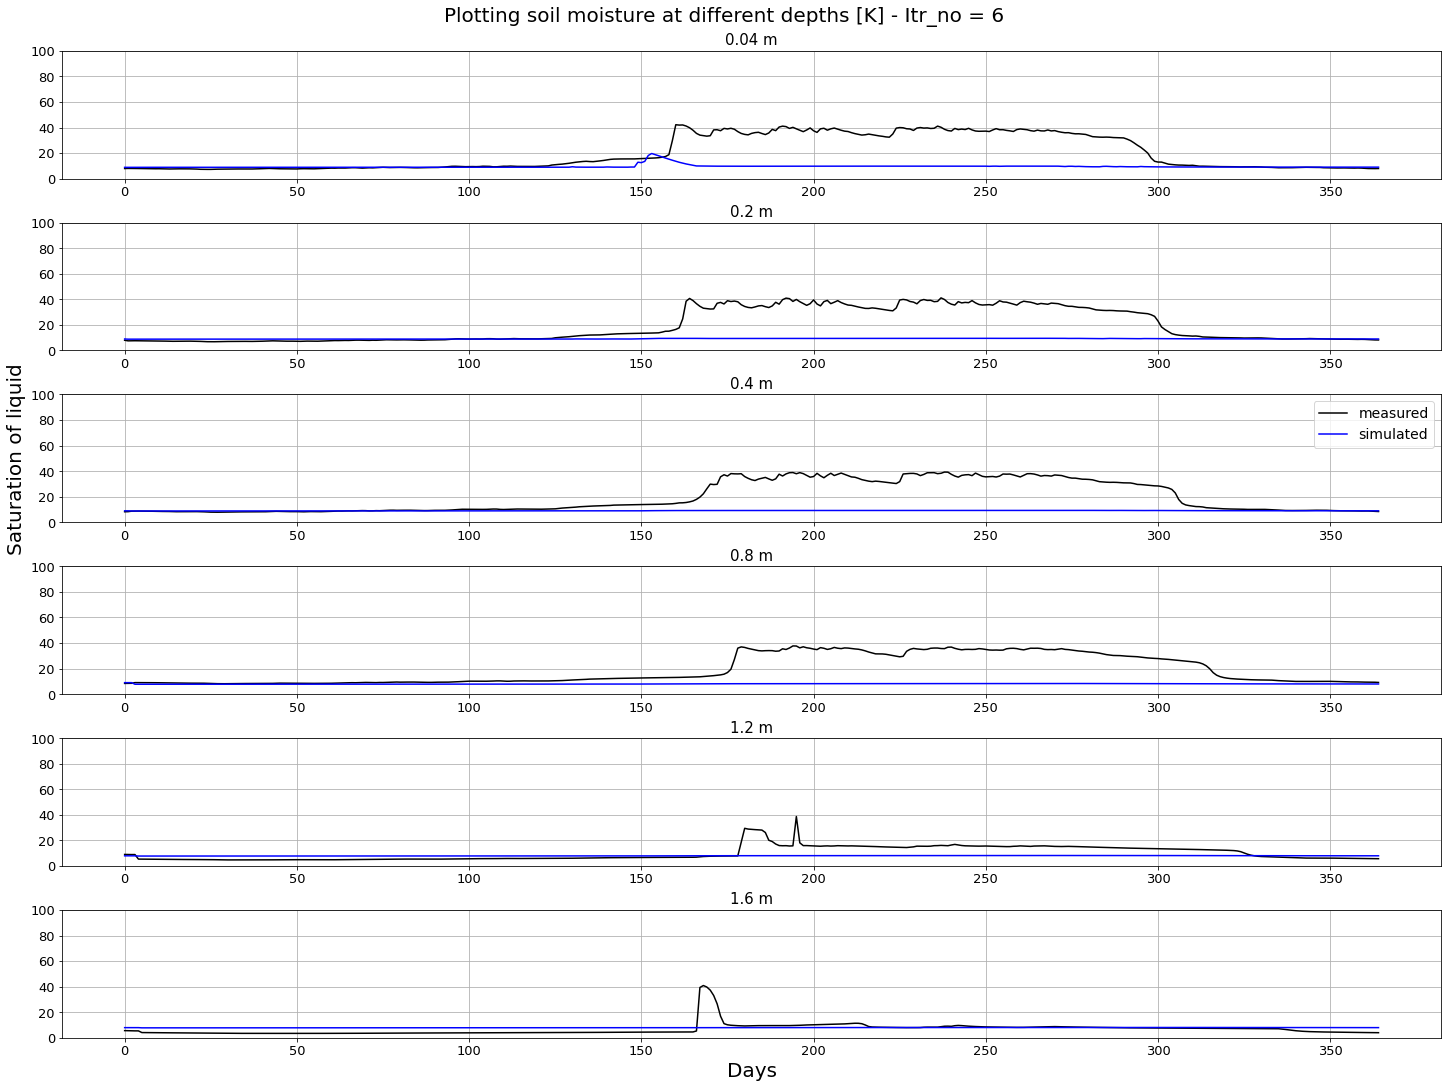

In [69]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(20,15), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=6, height_ratios=[1,1,1,1,1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])
f2_ax3 = fig2.add_subplot(spec2[2, 0])
f2_ax4 = fig2.add_subplot(spec2[3, 0])
f2_ax5 = fig2.add_subplot(spec2[4, 0])
f2_ax6 = fig2.add_subplot(spec2[5, 0])

fig2.suptitle(f'Plotting soil moisture at different depths [K] - Itr_no = {itrno_best}', fontsize=20)


depths = [0.04, 0.2, 0.4, 0.8, 1.2, 1.6]

time_period = np.arange(0,365)

x = 0

for j, depth in enumerate(depths):
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_measured[x:x+365].values, 'k', label='measured')
    locals()['f2_ax'+str(j+1)].plot(time_period, mois_sim[x:x+365].values, 'b', label='simulated')
    locals()['f2_ax'+str(j+1)].set_title(f'{depth} m', fontsize=15)
    locals()['f2_ax'+str(j+1)].grid(True)
    #locals()['f2_ax'+str(j+1)].legend(fontsize=14)
    locals()['f2_ax'+str(j+1)].set_ylim(0,100)
    
    x = x + 365

    for label in (locals()['f2_ax'+str(j+1)].get_xticklabels() + locals()['f2_ax'+str(j+1)].get_yticklabels()):
        label.set_fontsize(13)
        
f2_ax3.legend(fontsize=14)  
f2_ax3.set_ylabel('Saturation of liquid', fontsize=20)
f2_ax6.set_xlabel('Days', fontsize=20)

Comments:
1. The moisture estimates have remained more or less the same.! - The model process needs to be defined more accurately, change of parameters, addition of parameters, ..
2. 

<Figure size 720x432 with 0 Axes>

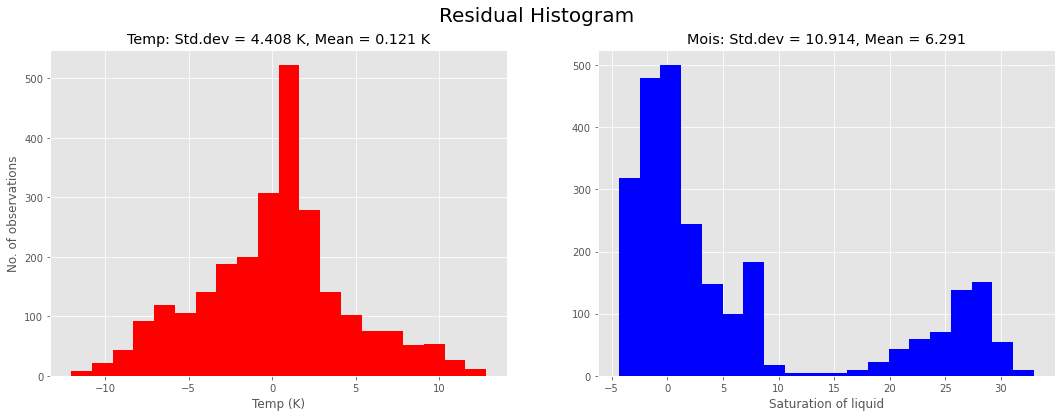

In [70]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Residual Histogram', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hist(temp_res, bins=20, color='r')
ax2.hist(mois_res, bins=20, color='b')
ax1.set_ylabel('No. of observations')
ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
ax1.set_xlabel('Temp (K)')
ax2.set_xlabel('Saturation of liquid')
plt.show()

**Comments:

1. The temperature observations show greater standard deviation compared to the moisture - Hence we need to consider to reweight the objective function. 
2.  The temperature is more or less equally distributed along the center. 
3. The moisture depicts a skew along the positive side of saturation of liquid. 

In [71]:
temp_res.describe()

count    2562.000000
mean        0.120871
std         4.407655
min       -12.033531
25%        -2.538666
50%         0.487641
75%         2.283564
max        12.796537
Name: Residual, dtype: float64

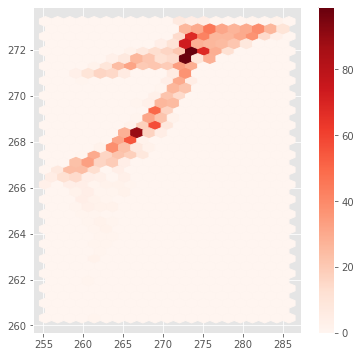

In [72]:
plt.figure(figsize=(6, 6))
plt.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
plt.colorbar()
plt.show()

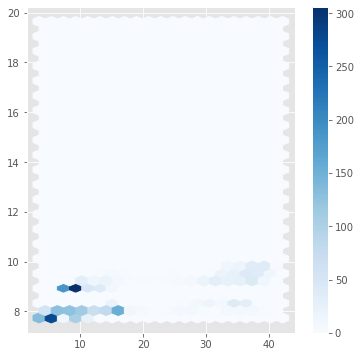

In [73]:
plt.figure(figsize=(6, 6))
plt.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Text(0.5, 1.0, 'Moisture')

<Figure size 720x432 with 0 Axes>

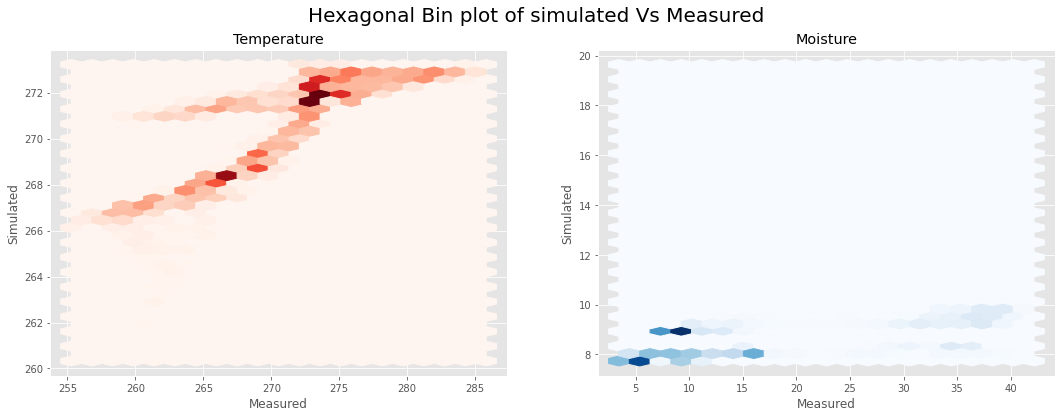

In [74]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Hexagonal Bin plot of simulated Vs Measured', fontsize=20)
fig.set_size_inches(18, 6)
ax1.hexbin(temp_measured, temp_sim, gridsize=(20,20), cmap=plt.cm.Reds)
#plt.colorbar()
ax1.set_ylabel('Simulated')
ax1.set_xlabel('Measured')
ax1.set_title('Temperature')

ax2.hexbin(mois_measured, mois_sim, gridsize=(20,20), cmap=plt.cm.Blues)
ax2.set_ylabel('Simulated')
ax2.set_xlabel('Measured')
ax2.set_title('Moisture')

#plt.colorbar(cax=ax1)

#ax1.hist(temp_res, bins=20, color='r')
#ax2.hist(mois_res, bins=20, color='b')
#ax1.set_ylabel('No. of observations')
#ax1.set_title(f'Temp: Std.dev = {np.round(temp_res.std(),3)} K, Mean = {np.round(temp_res.mean(),3)} K')
#ax2.set_title(f'Mois: Std.dev = {np.round(mois_res.std(),3)}, Mean = {np.round(mois_res.mean(),3)}')
#ax1.set_xlabel('Temp (K)')
#ax2.set_xlabel('Saturation of liquid')
#img1 = ax1.imshow(fig)
#fig.colorbar(img1)

#### f. Relative contribution of temperature and moisture on the objective function

In [75]:
obj_iteration

,model_runs_completed,total_phi,measurement_phi,regularization_phi,temp,mois
0,0,0.019674,0.019674,0,0.009837,0.009837
1,23,0.019616,0.019616,0,0.009839,0.009777
2,45,0.019336,0.019336,0,0.009826,0.009509
3,79,0.019335,0.019335,0,0.009825,0.009509
4,113,0.018351,0.018351,0,0.009774,0.008578
5,147,0.018347,0.018347,0,0.009776,0.008572
6,181,0.018346,0.018346,0,0.009774,0.008572


In [76]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

np.array(obj_itr_best[['temp','mois']])*1e6

array([9774.34, 8571.9 ])

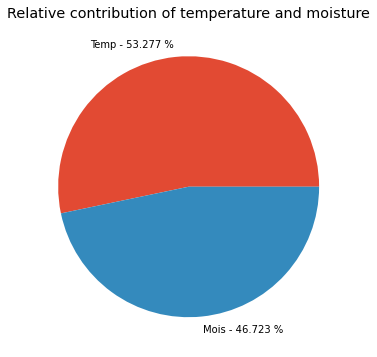

In [77]:
# Storing the iteration with the least objective function
obj_itr_best = obj_iteration.iloc[itrno_best,:]

con_variables = np.array(obj_itr_best[['temp','mois']])/obj_itr_best['measurement_phi']*100

### To find the percentage contribution, we need subtract it with total_phi and multiply 

plt.figure(figsize=(6,6))
plt.title('Relative contribution of temperature and moisture')
mylabels=[f'Temp - {np.round(con_variables[0],3)} %',f'Mois - {np.round(con_variables[1],3)} %']
plt.pie(con_variables,labels=mylabels)
#plt.legend()
plt.show()
#plt.legend()

### How does the best parameters look like? Are they plausible? How do they compare with the other cases? Do we go for the case with optimal value or a case that shows more physical possibility?

In [78]:
itrno_best

6

In [79]:
par_iteration.loc[itrno_best,:]

alpha_p    6.874620e-03
alpha_m    2.574920e-03
n_p        1.501150e+00
wr_p       1.347120e-01
por_p      6.466190e-01
por_m      4.832110e-01
perm_p     9.356590e-11
perm_m     7.193600e-14
pen_s      2.070560e-02
z_bg       4.035430e-02
z_s        1.250000e-03
b_bc       2.684500e+02
Name: 6, dtype: float64

### Exporting the values:

The values are mainly exported for the best iteration i.e. with the least objective function.

#### 1. Parameters:

In [85]:
file_name = 'Case5_III_su_cv_rw'

In [86]:
### Best parameters:
best_params = par_iteration.loc[itrno_best,:]
### Saving it as a csv file
best_params.to_csv(f'Final_comp_cases_data/best_params_{file_name}.csv',sep=',')

#### 2. Residuals - Temperature and moisture

In [87]:
res_best.to_csv(f'Final_comp_cases_data/best_res_{file_name}.csv',sep=',')

#### 3. Objective function

In [88]:
obj_iteration.to_csv(f'Final_comp_cases_data/obj_fn_{file_name}.csv',sep=',')

#### 4. Parameter sensitivity - best

In [89]:
sen_best = sen_iteration.loc[itrno_best,:]
sen_best.to_csv(f'Final_comp_cases_data/best_sen_{file_name}.csv',sep=',')